# Hopfield Networks Tutorial


# Understanding Hopfield Networks

Hopfield Networks are a type of recurrent artificial neural network used for associative memory and pattern recognition. They were introduced by John Hopfield in 1982 and are a form of energy-based model, originally derived from the Ising model of ferromagnetism. Hopfield Networks have applications in various fields, including optimization, image recognition, and content-addressable memory.

## Network Structure

A Hopfield Network consists of a set of interconnected neurons, where each neuron can be in one of two states: +1 (active) or -1 (inactive). The neurons are fully connected to each other, meaning that each neuron is connected to every other neuron in the network. The connections between neurons are symmetric, meaning that if neuron $i$ is connected to neuron $j$, then neuron $j$ is also connected to neuron $i$.

## Energy Function

The energy of a Hopfield Network is defined by an energy function, which measures how well the current state of the network matches the stored patterns. The energy function for a Hopfield Network is given by:

$$
E(\mathbf{s}) = -\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}w_{ij}s_is_j
$$

Where:
- $E(\mathbf{s})$ is the energy of the network in state $\mathbf{s}$
- $N$ is the number of neurons in the network
- $w_{ij}$ is the weight (synaptic connection strength) between neuron $i$ and neuron $j$
- $s_i$ is the state of neuron $i$, which can be +1 or -1

The energy function represents the negative of the network's Hamiltonian, and it is used to measure the compatibility between the current state of the network and the stored patterns. Lower energy indicates a better match with the stored patterns.


This energy function is a Lyapunov function, meaning it decreases or stays the same during the network's dynamics. When training a Hopfield network, the goal is to lower the energy of states that the network should "remember." This allows the network to serve as a content addressable memory system.
## States

In the context of a Hopfield network, a "state" refers to the configuration of the network's neurons at a specific time. Each neuron in a Hopfield network can be in one of two states, typically represented as -1 or +1. These states are often used to indicate whether a neuron is "inactive" or "active", respectively. A state of the network is essentially a vector of these neuron states, where each element of the vector corresponds to the state of a specific neuron in the network.

For example, in a Hopfield network with 3 neurons, a state could be represented as [1, -1, 1], indicating that the first neuron is active, the second neuron is inactive, and the third neuron is active.

In the context of Hopfield networks, a state is considered a fixed point if it is a local minimum of the energy function. This means that the state does not change under the network's dynamics, and it represents a stable configuration of the network. When determining if a state is a fixed point in a Hopfield network, it involves evaluating whether the energy of the state remains unchanged during the network's dynamics.

Certainly! Let's begin with Step 1, where we initialize the Hopfield network with 2 nodes and display the initial weight matrix. I'll also provide a visual representation of the network at this stage.

### Step 1: Initialization

We start with a Hopfield network of 2 nodes. The weight matrix for these nodes is initially set to zeros.

#### Initialization Code

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Hopfield Network
size = 2
weights = np.zeros((size, size))

#### Visualization After Initialization

To visualize the network, we will use a simple graph representation where each node represents a neuron, and the edges represent the weights (connections) between neurons. Since the weights are all zero initially, there will be no edges in the graph.

#### Visualization Code

In [30]:
def visualize_network(weights):
    G = nx.DiGraph()
    for i in range(len(weights)):
        G.add_node(i)
        for j in range(len(weights)):
            if weights[i, j] != 0:
                G.add_edge(i, j, weight=weights[i, j])
    
    pos = nx.circular_layout(G)
    fig, ax = plt.subplots()
    
    nx.draw(G, pos, ax = ax, with_labels=True, node_color='skyblue', node_size=2000)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Hopfield Network")
    plt.show()

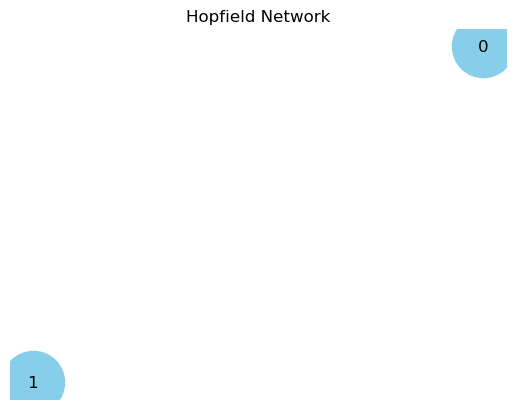

In [31]:
# Visualize the network after initialization
visualize_network(weights)

#### Displaying the Weight Matrix

To display the initial weight matrix, we can simply print it. At this stage, the matrix is a 2x2 matrix with all zeros.

In [32]:
print("Initial Weights Matrix:")
print(weights)

Initial Weights Matrix:
[[0. 0.]
 [0. 0.]]


### Step 2: Training the Network

Now, let's train our 2-node Hopfield network using a specific training pattern. The Hebbian learning rule will be applied to update the weights.

#### Training Data

We will use the following training pattern:

In [33]:
# Training pattern
pattern = np.array([1, -1])
pattern

array([ 1, -1])

This pattern represents a scenario where the first neuron is active (state = 1) and the second neuron is inactive (state = -1).

#### Training Code

We'll define a function to train the network and then apply it to our weight matrix.

In [34]:
def train_hopfield_network(weights, pattern):
    """
    Trains the Hopfield network using the Hebbian learning rule.
    
    :param weights: The weight matrix of the network.
    :param pattern: The training pattern.
    """
    weights += np.outer(pattern, pattern)
    np.fill_diagonal(weights, 0)

# Train the network
train_hopfield_network(weights, pattern)

#### Visualization After Training

Let's visualize the network again, this time showing the updated weights.

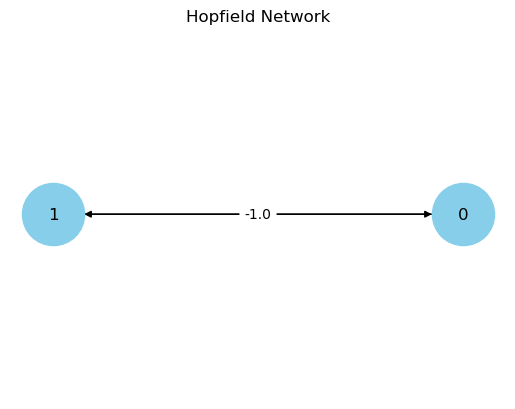

In [35]:
# Visualize the network after training
visualize_network(weights)

#### Displaying the Weight Matrix After Training

We'll print the weight matrix to see how it has changed after training.

In [36]:
print("Weights Matrix After Training:")
print(weights)

Weights Matrix After Training:
[[ 0. -1.]
 [-1.  0.]]


### Explanation of Training

During training:
- We use the outer product of the training pattern with itself to update the weights. This process strengthens the connections between neurons in a way that reflects their co-activation in the training pattern.
- Diagonal elements are set to zero to prevent self-connections.

### Expected Outcome

After training, the weight matrix will no longer be all zeros. Instead, it will reflect the learned pattern. In the network visualization, we expect to see connections (edges) representing these weights.

Running these code snippets in a Jupyter notebook will show how the Hopfield network learns from the given training pattern, both in terms of the updated weight matrix and the visual representation of the network's connections.

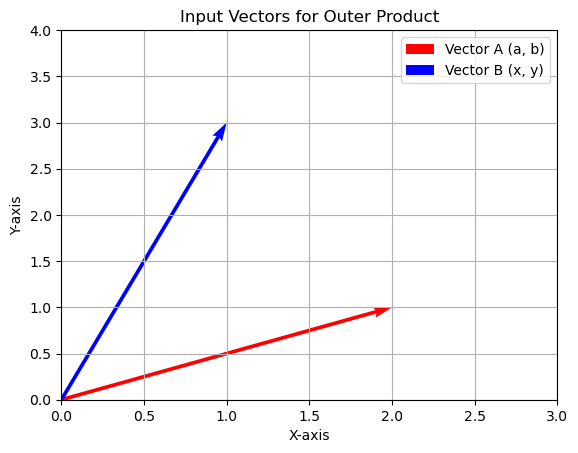

In [37]:
# Define the vectors
A = np.array([2, 1])  # Example vector A (a, b)
B = np.array([1, 3])  # Example vector B (x, y)

# Plot the vectors
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A (a, b)')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B (x, y)')
plt.xlim(0, 3)
plt.ylim(0, 4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.title('Input Vectors for Outer Product')
plt.legend()
plt.show()


Outer Product Matrix:
 [[2 6]
 [1 3]]


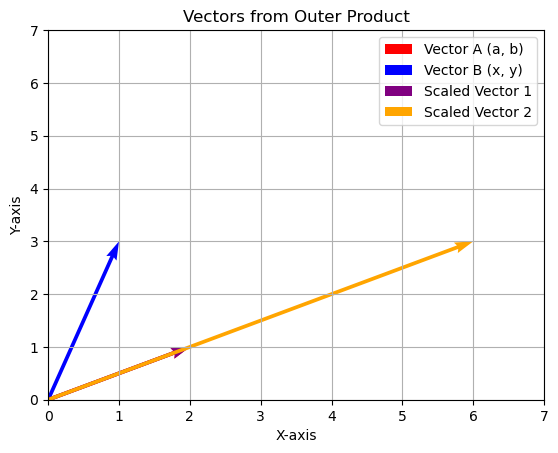

In [42]:
# Recalculate the outer product matrix for clarity
outer_product_matrix = np.outer(A, B)

# Display the matrix
print("Outer Product Matrix:\n", outer_product_matrix)

# Plot the original vectors
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector A (a, b)')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector B (x, y)')

# Plot each column of the outer product matrix as a vector in different colors
colors = ['purple', 'orange']  # Different colors for scaled vectors
for i in range(len(B)):
    scaled_vector = outer_product_matrix[:, i]
    plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy', scale_units='xy', scale=1,
               color=colors[i], label=f'Scaled Vector {i+1}')

plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='green',linewidth=0.5)
plt.grid()
plt.title('Vectors from Outer Product')
plt.legend()
plt.show()

